Solution inspired in the following resources:
* https://www.kaggle.com/code/fatmakursun/house-price-some-of-regression-models (Overall "template" for EDA, Feature Engineering and Model application)
* https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression (Overall "template" specifically for classification problems)
* https://www.kaggle.com/code/nayansakhiya/heart-fail-analysis-and-quick-prediction (Major inspiration on how to setup classification models and overall "template" for preliminary phases)
* https://www.kaggle.com/code/hatone/gradientboostingclassifier-with-gridsearchcv/script (Setting up GridSearchCV for GBC model)

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
last_column = df.pop('Attrition')

In [7]:
df.insert(34, 'Attrition', last_column)

In [8]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,No


In [9]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [13]:
label = LabelEncoder()
for data in df:    
    #df['BusinessTravel'] = label.fit_transform(df['BusinessTravel'])
    #df['Department'] = label.fit_transform(df['Department'])
    #df['EducationField'] = label.fit_transform(df['EducationField'])
    df['Gender'] = label.fit_transform(df['Gender'])
    #df['JobRole'] = label.fit_transform(df['JobRole'])
    df['MaritalStatus'] = label.fit_transform(df['MaritalStatus'])
    df['Over18'] = label.fit_transform(df['Over18'])
    df['OverTime'] = label.fit_transform(df['OverTime'])
    df['Attrition'] = label.fit_transform(df['Attrition'])

In [14]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,0
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,0
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,0
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,0


In [15]:
df1 = pd.get_dummies(df,columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole'])

In [16]:
df1.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MaritalStatus                        int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
Over18                               int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkin

Changing datatype of multiple columns in Pandas: https://stackoverflow.com/questions/55833729/how-to-change-datatype-of-multiple-columns-in-pandas

In [17]:
for column in df1.columns:
    if df1[column].dtype == 'uint8':
        df1[column] = df1[column].astype(np.int64)

In [18]:
df1.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MaritalStatus                        int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
Over18                               int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkin

In [19]:
df1.shape

(1470, 52)

In [20]:
last_column = df1.pop('Attrition')

In [21]:
df1.insert(51, 'Attrition', last_column)

In [22]:
df1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,41,1102,1,2,1,1,2,0,94,3,...,0,0,0,0,0,0,0,1,0,1
1,49,279,8,1,1,2,3,1,61,2,...,0,0,0,0,0,0,1,0,0,0
2,37,1373,2,2,1,4,4,1,92,2,...,0,0,1,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,0,56,3,...,0,0,0,0,0,0,1,0,0,0
4,27,591,2,1,1,7,1,1,40,3,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,1,41,4,...,0,0,1,0,0,0,0,0,0,0
1466,39,613,6,1,1,2062,4,1,42,2,...,1,0,0,0,0,0,0,0,0,0
1467,27,155,4,3,1,2064,2,1,87,4,...,0,0,0,0,1,0,0,0,0,0
1468,49,1023,2,3,1,2065,4,1,63,2,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:ylabel='Frequency'>

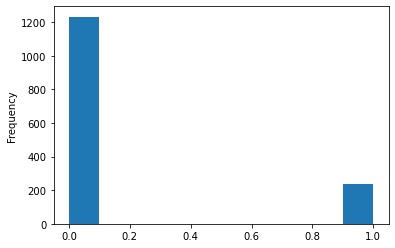

In [23]:
df1['Attrition'].plot.hist()

In [24]:
# Find correlations with the target and sort
correlations = df1.corr()['Attrition'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 EducationField_Human Resources      0.036466
NumCompaniesWorked                  0.043494
EducationField_Marketing            0.055781
EducationField_Technical Degree     0.069355
DistanceFromHome                    0.077924
Department_Sales                    0.080855
JobRole_Laboratory Technician       0.098290
BusinessTravel_Travel_Frequently    0.115143
JobRole_Sales Representative        0.157234
MaritalStatus                       0.162070
OverTime                            0.246118
Attrition                           1.000000
EmployeeCount                            NaN
Over18                                   NaN
StandardHours                            NaN
Name: Attrition, dtype: float64

Most Negative Correlations:
 TotalWorkingYears                   -0.171063
JobLevel                            -0.169105
YearsInCurrentRole                  -0.160545
MonthlyIncome                       -0.159840
Age                                 -0.159205
Year

In [25]:
# Find the correlation of the positive days since birth and target
df1['OverTime'] = abs(df1['OverTime'])
df1['OverTime'].corr(df1['Attrition'])

0.24611799424580444

In [26]:
print(df1['EmployeeCount'].value_counts())
print(df1['Over18'].value_counts())
print(df1['StandardHours'].value_counts())
print(df1['EmployeeNumber'].value_counts())

1    1470
Name: EmployeeCount, dtype: int64
0    1470
Name: Over18, dtype: int64
80    1470
Name: StandardHours, dtype: int64
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64


No meaningfull insights from these columns

In [27]:
df1.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [28]:
df1

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,41,1102,1,2,2,0,94,3,2,4,...,0,0,0,0,0,0,0,1,0,1
1,49,279,8,1,3,1,61,2,2,2,...,0,0,0,0,0,0,1,0,0,0
2,37,1373,2,2,4,1,92,2,1,3,...,0,0,1,0,0,0,0,0,0,1
3,33,1392,3,4,4,0,56,3,1,3,...,0,0,0,0,0,0,1,0,0,0
4,27,591,2,1,1,1,40,3,1,2,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,1,41,4,2,4,...,0,0,1,0,0,0,0,0,0,0
1466,39,613,6,1,4,1,42,2,3,1,...,1,0,0,0,0,0,0,0,0,0
1467,27,155,4,3,2,1,87,4,2,2,...,0,0,0,0,1,0,0,0,0,0
1468,49,1023,2,3,4,1,63,2,2,2,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df1 = df1.loc[:, df1.columns.intersection(['OverTime','MaritalStatus', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician', 'DistanceFromHome', 'Attrition'])]

df2 = df1.drop(df1.columns.difference(['OverTime','MaritalStatus', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician', 'DistanceFromHome', 'Attrition'], inplace=True))

In [30]:
df1

,DistanceFromHome,MaritalStatus,OverTime,BusinessTravel_Travel_Frequently,JobRole_Laboratory Technician,JobRole_Sales Representative,Attrition
0,1,2,1,0,0,0,1
1,8,1,0,1,0,0,0
2,2,2,1,0,1,0,1
3,3,1,1,1,0,0,0
4,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...
1465,23,1,0,1,1,0,0
1466,6,1,0,0,0,0,0
1467,4,1,1,0,0,0,0
1468,2,1,0,1,0,0,0


Getting rid of negative and very small correlated variables 

In [31]:
X = df1.iloc[:, 0:6].values
y = df1.iloc[:, 6].values.reshape(-1,1)

In [32]:
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

--------------------------------------------------------------------------------------------------------------------------------

## Models

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
accuracy_list = []

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [38]:
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  85.37%


In [39]:
cm = confusion_matrix(y_test, log_reg_pred)
print(cm)

[[242   4]
 [ 39   9]]


--------------------------------------------------------------------------------------------------------------------------------

### Support Vector Machine

In [40]:
# svc

sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [41]:
print("Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  83.67%


In [42]:
cm = confusion_matrix(y_test, sv_clf_pred)
print(cm)

[[246   0]
 [ 48   0]]


--------------------------------------------------------------------------------------------------------------------------------

### K Neighbors Classifier

In [43]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [44]:
print("Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  83.67%


In [45]:
cm = confusion_matrix(y_test, kn_pred)
print(cm)

[[244   2]
 [ 46   2]]


--------------------------------------------------------------------------------------------------------------------------------

### Decision Tree Classiffier

In [46]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [47]:
print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  83.67%


--------------------------------------------------------------------------------------------------------------------------------

In [48]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [49]:
print("Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  82.99%


--------------------------------------------------------------------------------------------------------------------------------

### Gradient Boosting Classifier

In [50]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [51]:
print("Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  85.71%


--------------------------------------------------------------------------------------------------------------------------------

## Accuracy Comparison

In [52]:
model_list = ['LogisticRegression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest', 'GradientBooster']

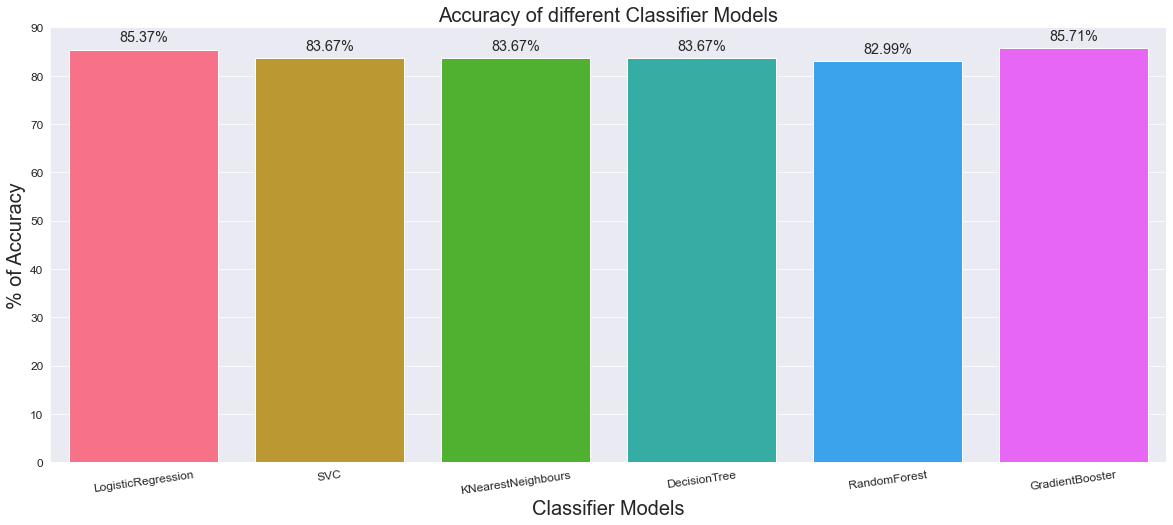

In [53]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Gradient Booster Classifer shows a considerable better performance than the other models

In [54]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf1 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf1.fit(X_train, y_train)
print(clf1.score(X_train, y_train))
print(clf1.best_params_)